In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr


In [2]:
df=pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.isnull().sum().sum()

6965

In [4]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['MSZoning'] = encoder.fit_transform(df['MSZoning'])
df['Street'] = encoder.fit_transform(df['Street'])
df['Alley'] = encoder.fit_transform(df['Alley'])
df['LotShape'] = encoder.fit_transform(df['LotShape'])
df['LandContour'] = encoder.fit_transform(df['LandContour'])
df['Utilities'] = encoder.fit_transform(df['Utilities'])
df['LotConfig'] = encoder.fit_transform(df['LotConfig'])
df['LandSlope'] = encoder.fit_transform(df['LandSlope'])
df['Neighborhood'] = encoder.fit_transform(df['Neighborhood'])
df['Condition1'] = encoder.fit_transform(df['Condition1'])
df['Condition2'] = encoder.fit_transform(df['Condition2'])
df['BldgType'] = encoder.fit_transform(df['BldgType'])
df['HouseStyle'] = encoder.fit_transform(df['HouseStyle'])
df['OverallQual'] = encoder.fit_transform(df['OverallQual'])
df['OverallCond'] = encoder.fit_transform(df['OverallCond'])
df['RoofStyle'] = encoder.fit_transform(df['RoofStyle'])
df['RoofMatl'] = encoder.fit_transform(df['RoofMatl'])
df['Exterior1st'] = encoder.fit_transform(df['Exterior1st'])
df['Exterior2nd'] = encoder.fit_transform(df['Exterior2nd'])
df['MasVnrType'] = encoder.fit_transform(df['MasVnrType'])
df['ExterQual'] = encoder.fit_transform(df['ExterQual'])
df['ExterCond'] = encoder.fit_transform(df['ExterCond'])
df['Foundation'] = encoder.fit_transform(df['Foundation'])
df['BsmtQual'] = encoder.fit_transform(df['BsmtQual'])
df['BsmtCond'] = encoder.fit_transform(df['BsmtCond'])
df['BsmtExposure'] = encoder.fit_transform(df['BsmtExposure'])
df['BsmtFinType1'] = encoder.fit_transform(df['BsmtFinType1'])
df['BsmtFinType2'] = encoder.fit_transform(df['BsmtFinType2'])
df['Heating'] = encoder.fit_transform(df['Heating'])
df['HeatingQC'] = encoder.fit_transform(df['HeatingQC'])
df['CentralAir'] = encoder.fit_transform(df['CentralAir'])
df['Electrical'] = encoder.fit_transform(df['Electrical'])
df['KitchenQual'] = encoder.fit_transform(df['KitchenQual'])
df['Functional'] = encoder.fit_transform(df['Functional'])
df['FireplaceQu'] = encoder.fit_transform(df['FireplaceQu'])
df['GarageType'] = encoder.fit_transform(df['GarageType'])
df['GarageFinish'] = encoder.fit_transform(df['GarageFinish'])
df['GarageQual'] = encoder.fit_transform(df['GarageQual'])
df['GarageCond'] = encoder.fit_transform(df['GarageCond'])
df['PavedDrive'] = encoder.fit_transform(df['PavedDrive'])
df['PoolQC'] = encoder.fit_transform(df['PoolQC'])
df['Fence'] = encoder.fit_transform(df['Fence'])
df['MiscFeature'] = encoder.fit_transform(df['MiscFeature'])
df['SaleType'] = encoder.fit_transform(df['SaleType'])
df['SaleCondition'] = encoder.fit_transform(df['SaleCondition'])
df.head()



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,2,3,3,0,...,0,3,4,4,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,2,3,3,0,...,0,3,4,4,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,2,0,3,0,...,0,3,4,4,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,2,0,3,0,...,0,3,4,4,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,2,0,3,0,...,0,3,4,4,0,12,2008,8,4,250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int32  
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int32  
 6   Alley          1460 non-null   int32  
 7   LotShape       1460 non-null   int32  
 8   LandContour    1460 non-null   int32  
 9   Utilities      1460 non-null   int32  
 10  LotConfig      1460 non-null   int32  
 11  LandSlope      1460 non-null   int32  
 12  Neighborhood   1460 non-null   int32  
 13  Condition1     1460 non-null   int32  
 14  Condition2     1460 non-null   int32  
 15  BldgType       1460 non-null   int32  
 16  HouseStyle     1460 non-null   int32  
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df.drop(columns=["Id"], inplace=True)
df.fillna(df.mean(), inplace=True)


In [7]:
correlations = {}
target_variable = 'SalePrice'  # Replace 'target_column' with the name of your target column
for column in df.columns:
    if column != target_variable:
        correlation = pearsonr(df[column], df[target_variable])[0]
        correlations[column] = correlation  # Store correlation coefficient

# Sort the features based on their absolute correlation with the target variable
sorted_correlations = sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)

# Select the top k features based on correlation coefficient
k = 15  # You can adjust this value to select a different number of features
top_features = sorted_correlations[:k]

print("Top Features based on Pearson correlation:")
for feature, correlation in top_features:
    print(f"{feature}: {correlation}")

Top Features based on Pearson correlation:
OverallQual: 0.7909816005838048
GrLivArea: 0.708624477612652
GarageCars: 0.6404091972583521
ExterQual: -0.6368836943991127
GarageArea: 0.6234314389183616
BsmtQual: -0.6208861300191693
TotalBsmtSF: 0.6135805515591954
1stFlrSF: 0.6058521846919146
KitchenQual: -0.5891887782994213
FullBath: 0.560663762748446
GarageFinish: -0.5492467563332125
TotRmsAbvGrd: 0.5337231555820282
YearBuilt: 0.5228973328794968
YearRemodAdd: 0.5071009671113862
MasVnrArea: 0.4752413167736677


In [8]:
top_features = [feature for feature, _ in sorted_correlations[:k]]

# Create a new DataFrame with selected features and the target variable
df1 = df[top_features + [target_variable]]

# Save the new DataFrame to a new CSV file if needed
df1.to_csv('selected_features_with_target.csv', index=False)
df1.head()

,OverallQual,GrLivArea,GarageCars,ExterQual,GarageArea,BsmtQual,TotalBsmtSF,1stFlrSF,KitchenQual,FullBath,GarageFinish,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,SalePrice
0,6,1710,2,2,548,2,856,856,2,2,1,8,2003,2003,196.0,208500
1,5,1262,2,3,460,2,1262,1262,3,2,1,6,1976,1976,0.0,181500
2,6,1786,2,2,608,2,920,920,2,2,1,6,2001,2002,162.0,223500
3,6,1717,3,3,642,3,756,961,2,1,2,7,1915,1970,0.0,140000
4,7,2198,3,2,836,2,1145,1145,2,2,1,9,2000,2000,350.0,250000


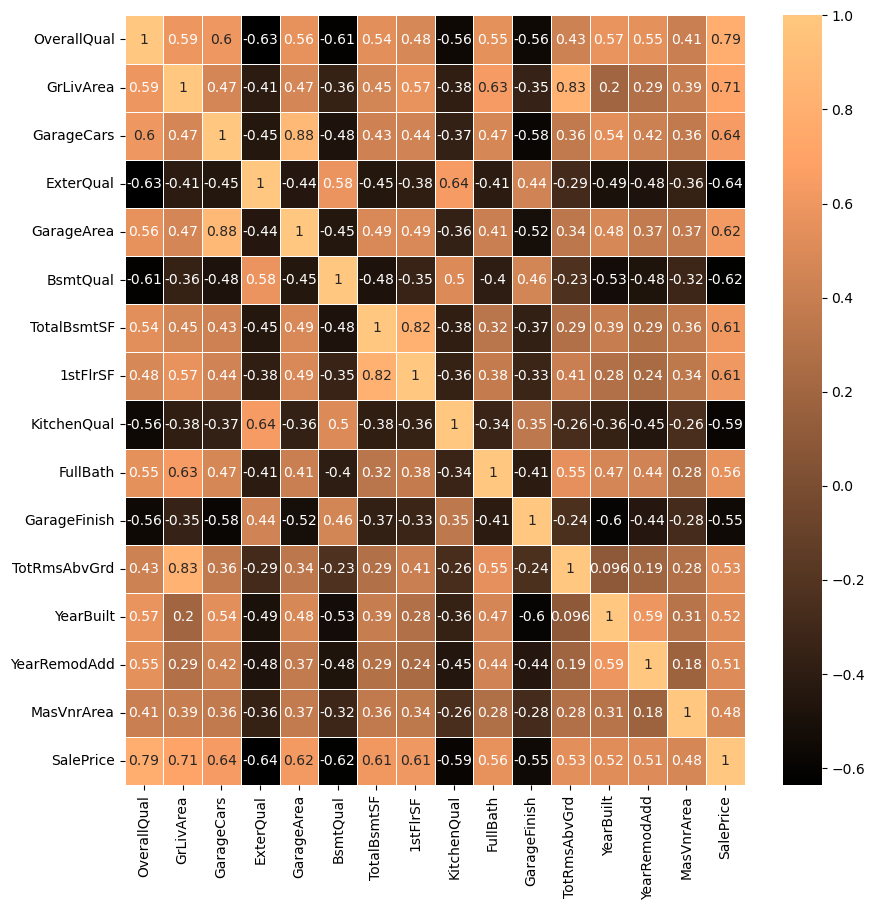

In [9]:
f,ax = plt.subplots(figsize = (10, 10))
ax=sns.heatmap(df1.corr(), cmap='copper', linewidths=0.5, annot=True)
plt.savefig("correlation.png")

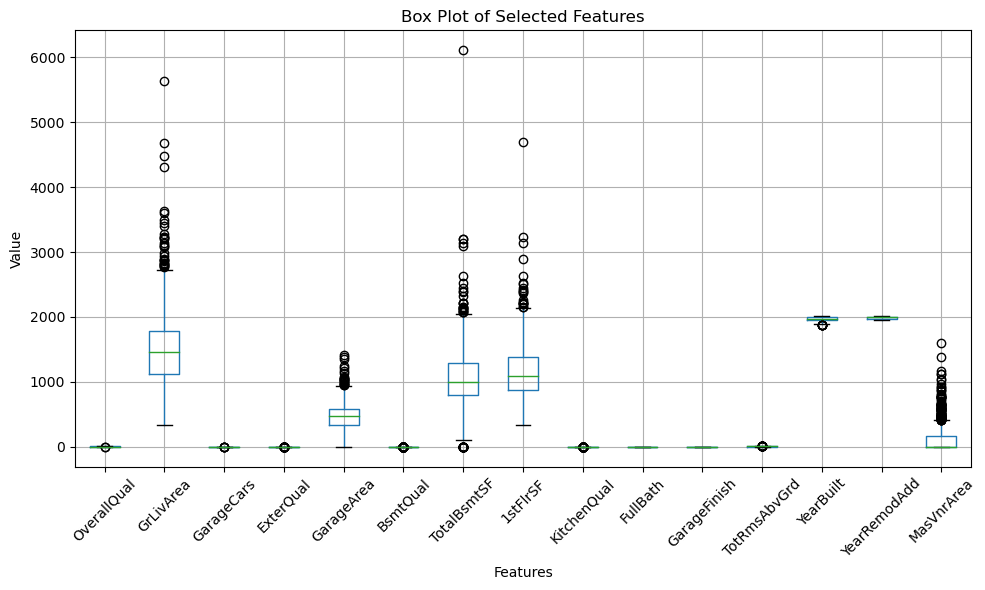

In [10]:
target_variable = 'SalePrice'  # Replace 'target_column' with the name of your target column
features = [col for col in df1.columns if col != target_variable]

# Draw box plots for each selected feature
plt.figure(figsize=(10, 6))
df1[features].boxplot()
plt.title('Box Plot of Selected Features')
plt.ylabel('Value')
plt.xlabel('Features')
plt.xticks(rotation=45)  # Rotate feature names for better visibility
plt.tight_layout()
plt.show()

In [11]:
Q1 = df1.quantile(0.25)

# Calculate the third quartile (Q3)
Q3 = df1.quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define a threshold for outliers
threshold = 1.5

# Identify outlier indices
outlier_indices = ((df1 < (Q1 - threshold * IQR)) | (df1 > (Q3 + threshold * IQR))).any(axis=1)

# Remove outliers
df_cleaned = df1[~outlier_indices]

# Display the cleaned DataFrame
print("Original DataFrame shape:", df1.shape)
print("Cleaned DataFrame shape:", df_cleaned.shape)

Original DataFrame shape: (1460, 16)
Cleaned DataFrame shape: (1154, 16)


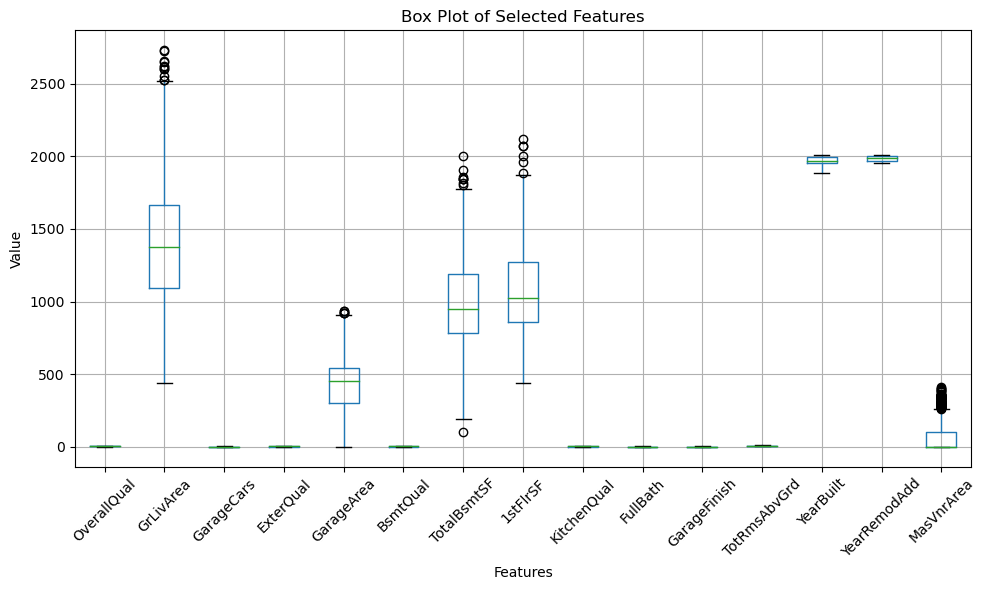

In [12]:
target_variable = 'SalePrice'  # Replace 'target_column' with the name of your target column
features1 = [col for col in df_cleaned.columns if col != target_variable]

# Draw box plots for each selected feature
plt.figure(figsize=(10, 6))
df_cleaned[features1].boxplot()
plt.title('Box Plot of Selected Features')
plt.ylabel('Value')
plt.xlabel('Features')
plt.xticks(rotation=45)  # Rotate feature names for better visibility
plt.tight_layout()
plt.show()

In [13]:
df_cleaned.to_csv("cleaned_train.csv")